In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### process the data

In [2]:
well_data = pd.read_excel('../data/Data-Wells.xlsx')

In [3]:
well_data.head(3)

,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,Well Comments,Scr Elev Range,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd
0,76970,1021 Westview Way,05/10/19,nd,05/08/19,14:05,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1021 Westview Way</name>,</Folder>,<Folder><name>n/a</name>,NaN,0.001,NaN,2019-05-08 00:00:00
1,76971,1024 Westview Way,05/10/19,nd,05/08/19,14:18,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1024 Westview Way</name>,</Folder>,NaN,NaN,0.001,NaN,2019-05-08 00:00:00
2,76969,1049 Westview Way,05/10/19,nd,05/08/19,14:43,NaN,05/14/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1049 Westview Way</name>,</Folder>,NaN,</Folder>,0.001,NaN,2019-05-08 00:00:00


In [4]:
mw22 = well_data.loc[well_data['Well Name'] == 'MW-22'].copy()
mw22.loc[:, 'ds']= pd.to_datetime(mw22['Date Sampled'])
mw22.loc[:, 'dioxane_results']= pd.to_numeric(mw22['1,4-Dioxane Results (ppb)'])
mw22.head(5)

,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd,ds,dioxane_results
13157,115,MW-22,NaN,63000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,<Folder><name>MW-22</name>,NaN,<Folder><name>860-880</name>,NaN,63000.0,MaxToDate,2019-10-30 00:00:00,1987-07-23,63000
13158,116,MW-22,NaN,83000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,MaxToDate,2019-10-30 00:00:00,1987-07-23,83000
13159,117,MW-22,NaN,60000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1987-07-23,60000
13160,180,MW-22,NaN,70000,10/17/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1987-10-17,70000
13161,229,MW-22,NaN,63000,04/14/88,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1988-04-14,63000


In [5]:
di_time = mw22.iloc[:, lambda df: df.columns.str.contains('ds|dioxane_results',
                                              case=False)].copy()
di_time.rename(columns = {'dioxane_results':'y'}, inplace = True)
di_time.head()

,ds,y
13157,1987-07-23,63000
13158,1987-07-23,83000
13159,1987-07-23,60000
13160,1987-10-17,70000
13161,1988-04-14,63000


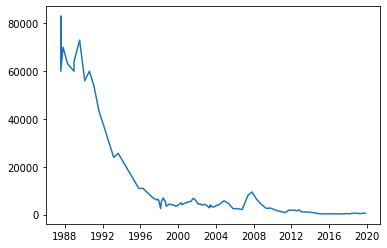

In [6]:
test = di_time
plt.plot(test.ds, test.y)
plt.show()

### Prophet

#### 2 years

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2020-01-01  1463.741700 -2679.413374  5420.611194
1 2020-02-01  2509.996370 -2139.121525  6706.072557
2 2020-03-01 -3048.673771 -7121.919906  1177.974353
3 2020-04-01 -2273.228877 -6422.338569  2102.385865
4 2020-05-01   554.613726 -3113.696186  4841.540458


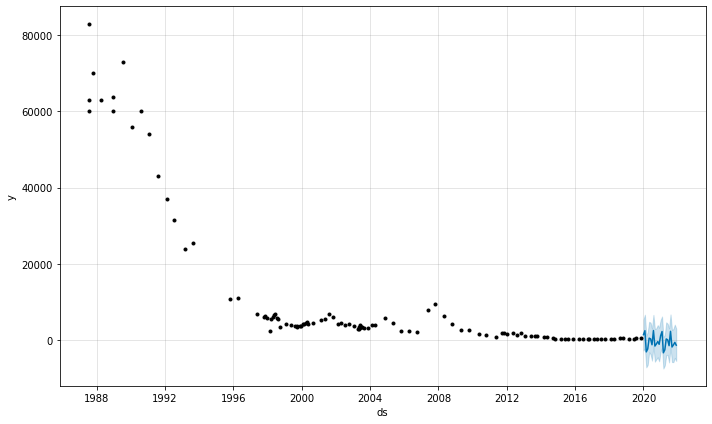

In [7]:
model = Prophet()
# fit the model
model.fit(di_time)
# define the period for which we want a prediction
future = list()
for y in range(0, 2):
    for i in range(1, 13):
        date = '%04d-%02d' % (2020 + y,  i)
        future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

#### 5 years

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2020-01-01  1463.741700 -2646.444099  6041.735891
1 2020-02-01  2509.996370 -1635.786250  6712.608362
2 2020-03-01 -3048.673771 -7384.204443  1371.311229
3 2020-04-01 -2273.228877 -6374.654744  2027.735932
4 2020-05-01   554.613726 -3467.730460  4619.883527


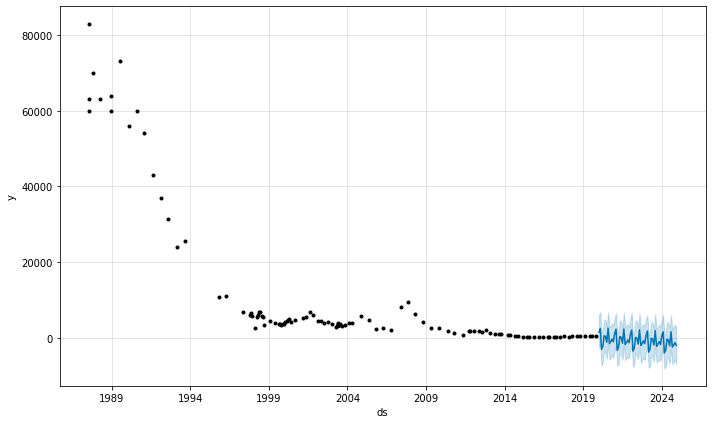

In [8]:
model = Prophet()
# fit the model
model.fit(di_time)
# define the period for which we want a prediction
future = list()
for y in range(0, 5):
    for i in range(1, 13):
        date = '%04d-%02d' % (2020 + y,  i)
        future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

#### 10 years

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2020-01-01  1463.741700 -2503.865403  5652.700579
1 2020-02-01  2509.996370 -1632.961609  6657.391762
2 2020-03-01 -3048.673771 -7479.301706  1004.460834
3 2020-04-01 -2273.228877 -6473.421965  1864.248435
4 2020-05-01   554.613726 -3484.802198  4681.894721


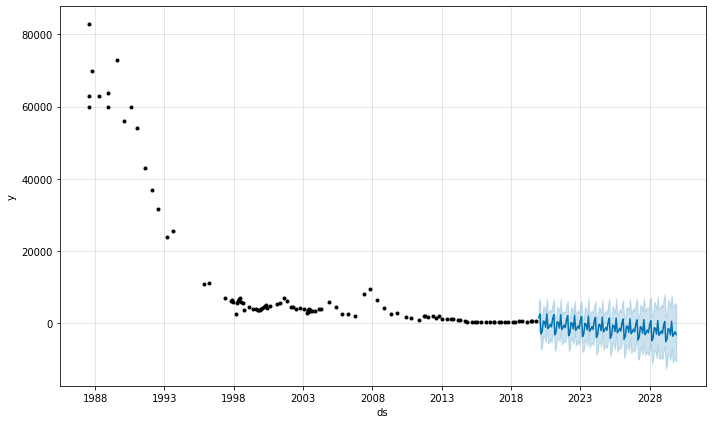

In [9]:
model = Prophet()
# fit the model
model.fit(di_time)
# define the period for which we want a prediction
future = list()
for y in range(0, 10):
    for i in range(1, 13):
        date = '%04d-%02d' % (2020 + y,  i)
        future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

### ARIMA model

In [190]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data = sm.datasets.co2.load_pandas()
y = data.data
print(type(y))
print(type(di_time))
print(type(y['co2']))
print(y['co2'].head(2))
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
1958-03-29    316.1
1958-04-05    317.3
Freq: W-SAT, Name: co2, dtype: float64
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


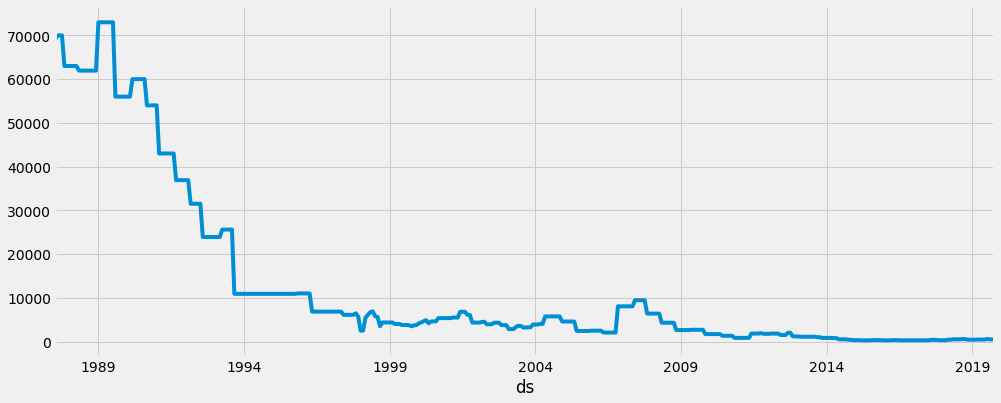

In [206]:
di_time = di_time.set_index(pd.DatetimeIndex(di_time['ds']))
arima = pd.DataFrame()
arima['di'] = pd.Series(di_time['y'])
arima = arima['di'].resample('MS').mean()
arima = arima.fillna(arima.bfill())
arima.plot(figsize=(15, 6))
plt.show()

In [214]:
arima

ds
1987-07-01    68666.666667
1987-08-01    70000.000000
1987-09-01    70000.000000
1987-10-01    70000.000000
1987-11-01    63000.000000
                  ...     
2019-06-01      450.000000
2019-07-01      580.000000
2019-08-01      500.000000
2019-09-01      500.000000
2019-10-01      500.000000
Freq: MS, Name: di, Length: 388, dtype: float64

<AxesSubplot:xlabel='ds'>

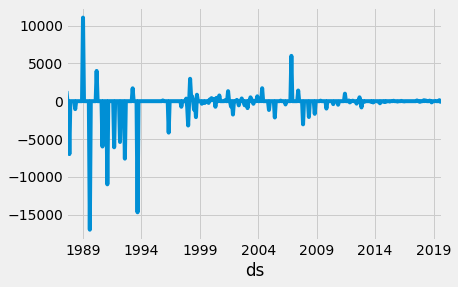

In [207]:
diff1 = arima.diff(1).dropna()

diff1.plot()

<AxesSubplot:xlabel='ds'>

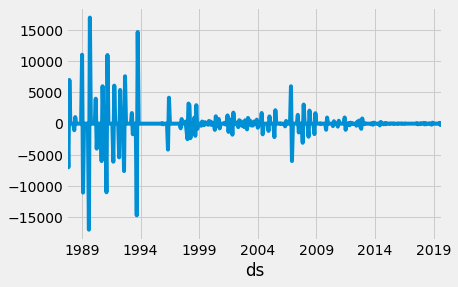

In [208]:
diff2 = diff1.diff(1).dropna()
diff2.plot()

In [209]:
from arch.unitroot import ADF
print(ADF(diff1.dropna()))

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.139
P-value                         0.024
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


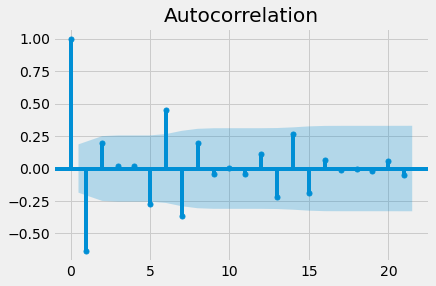

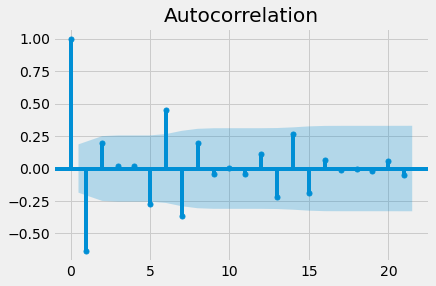

In [198]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff2)

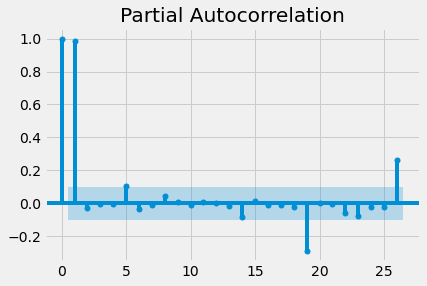

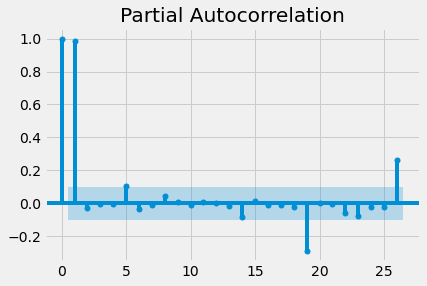

In [210]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(arima)

In [213]:
import statsmodels.api as sm

In [195]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(arima,
                                            order=param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x - AIC:{}'.format(param, results.aic))
        except:
            print('?')

ARIMA(0, 0, 0)x - AIC:2548.600957817746
ARIMA(0, 0, 1)x - AIC:2429.1283379965857
ARIMA(0, 1, 0)x - AIC:2154.2654866246166
ARIMA(0, 1, 1)x - AIC:2094.1119225051575
ARIMA(1, 0, 0)x - AIC:2188.501568099873
ARIMA(1, 0, 1)x - AIC:2112.179886382884
ARIMA(1, 1, 0)x - AIC:2135.4183883399646
ARIMA(1, 1, 1)x - AIC:2091.379368107151


                               SARIMAX Results                                
Dep. Variable:                     di   No. Observations:                  388
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3424.650
Date:                Sat, 03 Apr 2021   AIC                           6855.300
Time:                        23:02:15   BIC                           6867.175
Sample:                    07-01-1987   HQIC                          6860.008
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0095     14.003      0.001      0.999     -27.436      27.456
ma.L1          0.0098     14.006      0.001      0.999     -27.441      27.461
sigma2      2.742e+06   3.67e+04     74.750      0.0

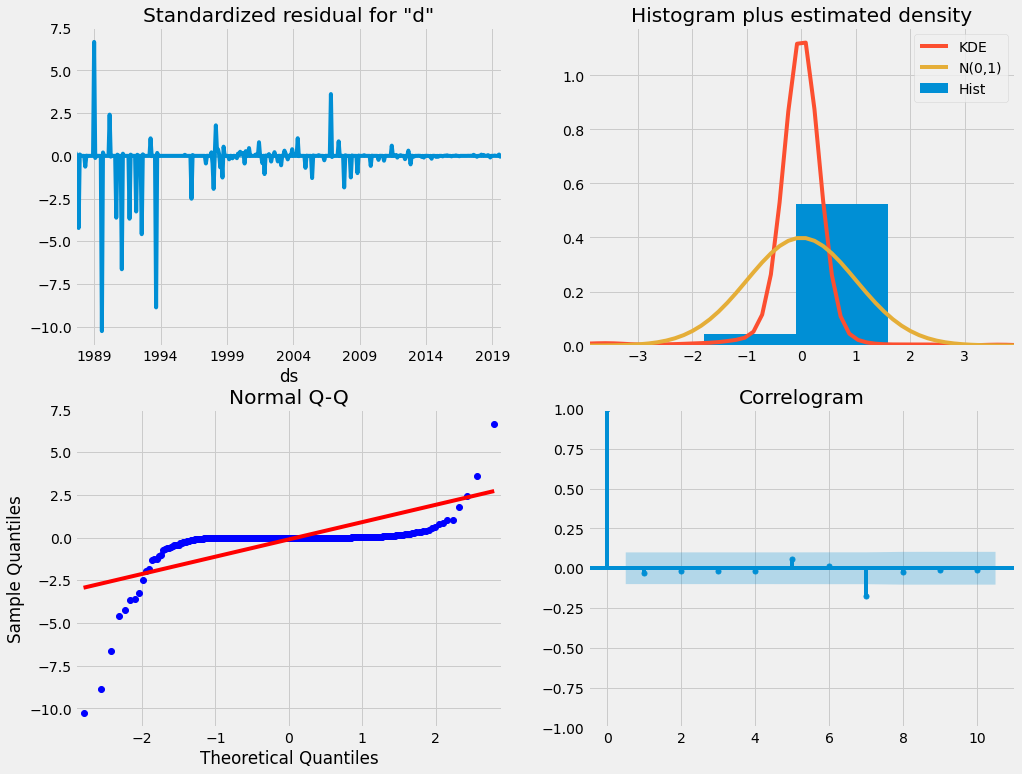

In [212]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(arima, order=(1,1,1))
result = model.fit()
print(result.summary())
result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [203]:
pred = result.predict('1998','2016',dynamic=True, typ='levels')
print (pred)

ds
1998-02-23    5936.426202
1998-03-23    5820.684696
1998-04-22    5879.847885
1998-05-20    5849.605641
1998-06-18    5865.064465
                 ...     
2015-03-09    5859.835370
2015-05-27    5859.835370
2015-07-29    5859.835370
2015-11-09    5859.835370
2016-03-14    5859.835370
Name: predicted_mean, Length: 76, dtype: float64


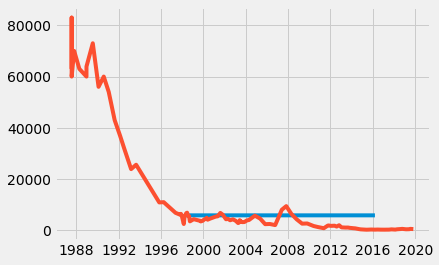

In [204]:
plt.plot(pred)
plt.plot(arima)
plt.show()

### MannKendall


In [7]:
import numpy as np
import pymannkendall as mk

# Data generation for analysis
data = test.y

result = mk.original_test(data)
print(result)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-11.794613558163386, Tau=-0.7512642225031606, s=-4754.0, var_s=162393.33333333334, slope=-84.47214854111405, intercept=8450.440318302386)


In [8]:
print(result.slope)

-84.47214854111405
